# 一. 收集数据
### 通过编程下载、API接口方式收集数据，并把数据导入pandas Dataframe中

In [1]:
import tweepy
import pandas as pd
import numpy as np
import requests
import os
import json
from pprint import pprint
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [2]:
# 使用编程方式从Github下载image-predictions.tsv文件
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1],'wb') as file:
    file.write(r.content)

"\nurl = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'\nr = requests.get(url)\nwith open(url.split('/')[-1],'wb') as file:\n    file.write(r.content)\n"

In [4]:
# 将twitter-archive-enhanced.csv文件导入pandas dataframe
# 将image-predictions.tsv文件导入pandas dataframe

twitter_data = pd.read_csv('twitter-archive-enhanced.csv', parse_dates=['timestamp'])
image_predictions = pd.read_csv('image-predictions.tsv', '\t',
                               dtype={'tweet_id':'str'})

In [5]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# 从tweetter API获取文件并导入tweet_json1.txt: 成功获取并导入了数据集
# 在下面的清理分析中，使用的是项目提供的数据集tweet_json.txt

'''
consumer_key = 'lp0AzHkEvRejWPul8nmMKt4KK'
consumer_secret = 'Oa2kHm045yAvXNQ9cBLO8dwYhltDIc3tgsT1vgnfXXm95uvKEd'
access_token = '338882441-yR4jzUXIyYIsg3rgfixN8UIZafVg5dwP7NOlysMe'
access_secret = 'OB6BHXmYj6HxoUupBRG3pT19810vm0xS07VpeTZ8zk7Dy'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

with open('tweet_json1.txt', 'w') as outfile:
    for tweet_id in twitter_data.tweet_id:
        try:
            info = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(info._json, outfile)
            outfile.write('\n')
            print("Success")
        
        except Exception as e:
            print e
'''


'\nconsumer_key = \'lp0AzHkEvRejWPul8nmMKt4KK\'\nconsumer_secret = \'Oa2kHm045yAvXNQ9cBLO8dwYhltDIc3tgsT1vgnfXXm95uvKEd\'\naccess_token = \'338882441-yR4jzUXIyYIsg3rgfixN8UIZafVg5dwP7NOlysMe\'\naccess_secret = \'OB6BHXmYj6HxoUupBRG3pT19810vm0xS07VpeTZ8zk7Dy\'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n\nwith open(\'tweet_json1.txt\', \'w\') as outfile:\n    for tweet_id in twitter_data.tweet_id:\n        try:\n            info = api.get_status(tweet_id, tweet_mode=\'extended\')\n            json.dump(info._json, outfile)\n            outfile.write(\'\n\')\n            print("Success")\n        \n        except Exception as e:\n            print e\n'

In [7]:
# 从项目提供的数据文件中读取json文件

data_extra = pd.DataFrame(columns=['id', 'favorite_count', 'retweet_count'])
file = open('tweet_json.txt', 'r')
for line in file.readlines():
    dic = json.loads(line)
    data_extra = data_extra.append({'id': dic['id'], 'favorite_count': dic['favorite_count'], 
                    'retweet_count': dic['retweet_count']}, ignore_index=True)

# 二、评估数据

## 质量问题

`twitter_data` 表格

- 狗狗的名字提取不准确，出现a、all、the等名字
- rating_numerator提取错误，如13.5/10错误提取为5/10
- source来源不清晰，应为“Twitter for iPhone”，“Vine - Make a Scene”等
- 记录中包含转发数据、回复数据、和没有图片的数据
- 错误的数据类型：tweet_id应为str, rating_numerator、rating_denominator类型应为float

`image-predictions` 表格

- 可信度保留的小数位数应一致，统一保留4位小数
- p1、p2、p3 首字母大小写不一致

`data_extra` 表格
- favorite_count、retweet_count应为int类型



## 整洁度问题

- twitter_data中doggo，floofer，pupper、puppo列应融合到单独的stage列
- 转发数、喜爱数与twitter_data应为同一类数据
- image-predictions中的数据与twitter_data应为同一类数据

In [8]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [9]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null object
favorite_count    2352 non-null object
retweet_count     2352 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [12]:
data_extra.head()

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


In [13]:
data_extra

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721
5,891087950875897856,20548,3240
6,890971913173991426,12053,2142
7,890729181411237888,66596,19548
8,890609185150312448,28187,4403
9,890240255349198849,32467,7684


In [14]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.0+ KB


In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


# 三、清理数据

In [17]:
# 复制数据集

twitter_data_copy = twitter_data.copy()
image_predictions_copy = image_predictions.copy()
data_extra_copy = data_extra.copy()

#### 测试

#### 问题：狗狗的名字提取不准确，出现a、all、the等名字
##### 定义
目测这些记录中没有狗狗名字，直接将名字替代为None
##### 代码

In [18]:
# 处理名字为a、an、the的记录，目测这些记录中没有狗狗名字。
# 应此将a、an、the替换为None

twitter_data_copy['name'] = twitter_data_copy['name'].replace(['a', 'an', 'the', None])

#### 测试

In [19]:
twitter_data_copy.name.value_counts()

None         778
Oliver        13
Charlie       12
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Daisy          8
Sadie          8
Buddy          7
Bailey         7
Toby           7
Stanley        7
Leo            6
Koda           6
Dave           6
Jack           6
Jax            6
Oscar          6
Rusty          6
Scout          6
Milo           6
Bella          6
Bentley        5
Oakley         5
Finn           5
very           5
            ... 
Jerome         1
Mutt           1
Doobert        1
Geoff          1
Kona           1
Angel          1
Bobb           1
Jonah          1
Berkeley       1
Chadrick       1
Ember          1
Steve          1
Laika          1
Socks          1
Eazy           1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn          1
Ester          1
Obi            1
Olaf           1
Lassie         1
Jennifur      

In [20]:
twitter_data_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
660,791312159183634433,NaN,NaN,2016-10-26 16:14:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Mabel. She's super h*ckin smol. Portab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791312159...,12,10,Mabel,None,None,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,None,None,None,None
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None


#### 问题：rating_numerator提取错误，如13.5/10错误提取为5/10
##### 定义
使用extract函数重新提取，并将数据类型转为float
##### 代码

In [21]:
# 重新提取rating_numerator和rating_denominator，并把数据类型改为float

rating = twitter_data_copy.text.str.extract('(\d+(?:\.\d+)?)/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_data_copy['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_data_copy['rating_denominator'] = rating['rating_denominator'].astype(float)

##### 测试

In [22]:
twitter_data_copy.rating_numerator.value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         9
0.00         2
420.00       2
9.75         2
15.00        2
960.00       1
84.00        1
24.00        1
17.00        1
13.50        1
143.00       1
121.00       1
80.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
50.00        1
Name: rating_numerator, dtype: int64

In [23]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[n

In [24]:
twitter_data_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None


#### 问题：source来源不清晰，应为“Twitter for iPhone”，“Vine - Make a Scene”等
##### 定义
从source中提现来源，替换原字段内容

##### 代码


In [25]:
twitter_data_copy['source'] = twitter_data_copy.source.str.extract(r"<.+>(.+)<.+>", expand=True)

##### 测试

In [26]:
twitter_data_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### 问题：记录中包含转发数据、回复数据和没有图片的数据
##### 定义
保留转发和回复数据为空的记录，并将转发和回复相关列去掉。没有图片的数据处理会在合并数据集时处理。

##### 代码

In [27]:
# 去掉转发与回复记录，并删除'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
# 'retweeted_status_user_id', 'retweeted_status_timestamp'列

twitter_data_copy = twitter_data_copy[twitter_data_copy.in_reply_to_status_id.isnull()]
twitter_data_copy = twitter_data_copy[twitter_data_copy.retweeted_status_id.isnull()]
twitter_data_copy = twitter_data_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                        'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### 测试

In [28]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 213.0+ KB


In [29]:
twitter_data_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


#### 问题：错误的数据类型：如id应为字符, rating_numerator 和rating_denominator应为float
##### 定义
使用astype函数转换数值类型，rating_numerator 和rating_denominator的转换已在上面处理

##### 代码

In [30]:
twitter_data_copy['tweet_id'] = twitter_data_copy['tweet_id'].astype(str)

##### 测试

In [31]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 213.0+ KB


#### 问题：可信度保留的小数位数应一致，统一保留4位小数

##### 定义
使用round函数四舍五入保留2位小数

##### 代码

In [32]:
# 将p1_conf、p2_conf、p3_conf四舍五入保留2位小数

image_predictions_copy.p1_conf = image_predictions_copy.p1_conf.round(2)
image_predictions_copy.p2_conf = image_predictions_copy.p2_conf.round(2)
image_predictions_copy.p3_conf = image_predictions_copy.p3_conf.round(2)

##### 测试

In [33]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


In [34]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.0+ KB


#### 问题：p1、p2、p3 首字母大小写不一致

##### 定义
使用capitalize函数将首字母大写
##### 代码


In [35]:
image_predictions_copy.p1 = image_predictions_copy.p1.str.capitalize()
image_predictions_copy.p2 = image_predictions_copy.p2.str.capitalize()
image_predictions_copy.p3 = image_predictions_copy.p3.str.capitalize()

##### 测试

In [36]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,Collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.51,True,Miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,Malinois,0.14,True,Bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,Redbone,0.36,True,Miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


#### 问题：data_extra表格favorite_count、retweet_count应为int类型
##### 定义
使用astype方法转换数据类型

##### 代码

In [37]:
data_extra_copy['favorite_count'] = data_extra_copy['favorite_count'].astype(int)
data_extra_copy['retweet_count'] =  data_extra_copy['retweet_count'].astype(int)

##### 测试

In [38]:
data_extra_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null object
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### 整洁度问题

#### 问题：twitter_data中doggo，floofer，pupper、puppo列应融合到单独的stage列

##### 定义
将doggo，floofer，pupper、puppo列的字符组合为新的stage列，如果包含2个以上的地位信息以“,”分隔，然后去掉doggo，floofer，pupper、puppo列。

##### 代码

In [39]:
twitter_data_copy.doggo.replace('None', '', inplace=True)
twitter_data_copy.floofer.replace('None', '', inplace=True)
twitter_data_copy.pupper.replace('None', '', inplace=True)
twitter_data_copy.puppo.replace('None', '', inplace=True)

In [40]:
twitter_data_copy['stage'] = twitter_data_copy.doggo + twitter_data_copy.floofer + twitter_data_copy.pupper + twitter_data_copy.puppo

In [41]:
twitter_data_copy.loc[twitter_data_copy.stage == 'doggopupper', 'stage' ] = 'doggo, pupper'
twitter_data_copy.loc[twitter_data_copy.stage == 'doggopuppo', 'stage' ] = 'doggo, puppo'
twitter_data_copy.loc[twitter_data_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [42]:
twitter_data_copy.loc[twitter_data_copy.stage == '', 'stage'] = np.nan

In [43]:
twitter_data_copy = twitter_data_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### 测试

In [44]:
twitter_data_copy.stage.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

In [45]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
stage                 336 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 163.8+ KB


In [46]:
twitter_data_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN


#### 问题
- 转发数、喜爱数与twitter_data应为同一类数据

##### 定义
使用merge函数将data_extra与twitter_data合并
##### 代码

In [65]:
# 将data_extra_copy中的id改名为tweet_id
# 根据tweet_id合并数据集
# str类型的tweet_id在使用merge函数时返回null，将tweet_id转换为int后成功合并

data_extra_copy.rename(columns={'id': 'tweet_id'}, inplace=True)
data_extra_copy['tweet_id'] = data_extra_copy['tweet_id'].astype(int)
twitter_data_copy['tweet_id'] = twitter_data_copy['tweet_id'].astype(int)
twitter_data_copy = pd.merge(twitter_data_copy, data_extra_copy, on="tweet_id", how="left")

twitter_data_copy['tweet_id'] = twitter_data_copy['tweet_id'].astype(str)

##### 测试

In [50]:
twitter_data_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,39492,8842
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,33786,6480
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,25445,4301
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,42863,8925
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,41016,9721
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,20548,3240
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,12053,2142
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,66596,19548
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,28187,4403
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,32467,7684


In [52]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
stage                 336 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 196.6+ KB


#### 问题：image-predictions中的数据与twitter_data应为同一类数据
##### 定义
使用merge函数将两个数据集合并，并去掉没有图片的记录。
##### 代码

In [54]:
# 合并twitter_data_copy, image_predictions_copy数据集，使用how="inner"过滤没有图片的记录

twitter_data_cleaned = pd.merge(twitter_data_copy, image_predictions_copy, on="tweet_id", how="inner")

##### 测试

In [55]:
twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
stage                 303 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 no

# 四、存储、分析与可视化

In [56]:
twitter_data_cleaned.to_csv('twitter_archive_master.csv')

In [57]:
twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
stage                 303 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 no

In [58]:
twitter_data_cleaned

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,39492,...,1,Orange,0.10,False,Bagel,0.09,False,Banana,0.08,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,33786,...,1,Chihuahua,0.32,True,Pekinese,0.09,True,Papillon,0.07,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,25445,...,1,Chihuahua,0.72,True,Malamute,0.08,True,Kelpie,0.03,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,42863,...,1,Paper_towel,0.17,False,Labrador_retriever,0.17,True,Spatula,0.04,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,41016,...,2,Basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,20548,...,1,Chesapeake_bay_retriever,0.43,True,Irish_terrier,0.12,True,Indian_elephant,0.08,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,12053,...,1,Appenzeller,0.34,True,Border_collie,0.20,True,Ice_lolly,0.19,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,66596,...,2,Pomeranian,0.57,True,Eskimo_dog,0.18,True,Pembroke,0.08,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,28187,...,1,Irish_terrier,0.49,True,Irish_setter,0.19,True,Chesapeake_bay_retriever,0.12,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,32467,...,1,Pembroke,0.51,True,Cardigan,0.45,True,Chihuahua,0.03,True


In [59]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,Collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.51,True,Miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,Malinois,0.14,True,Bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,Redbone,0.36,True,Miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


In [60]:
# 分析用户来源

source = twitter_data_cleaned.source.value_counts().plot(kind='bar', title='Tweet Source by Client')

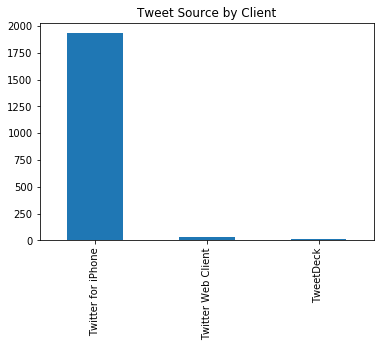

In [61]:
plt.show()

从上图可以看出，大多数用户使用手机发送信息。

In [62]:
# 分析用户点赞最高的前十位狗狗类型

dog_true = twitter_data_cleaned[twitter_data_cleaned['p1_dog'] == True]
grouped = dog_true['favorite_count'].groupby(dog_true['p1'])
grouped_top10 =  grouped.sum().sort_values(ascending=False).head(10)
grouped_top10.plot(kind='bar', title='Faverate Dogs Top10') 
plt.xlabel('Dog Type')

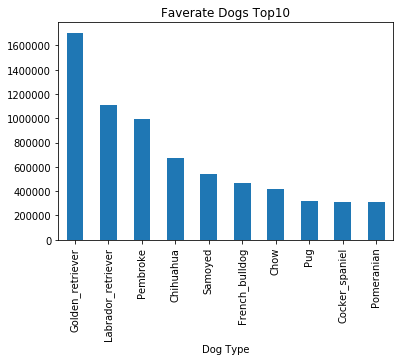

In [63]:
plt.show()

**最爱欢迎的狗狗类型top10：**
1. Golden_retriever
2. Pembroke
3. Labrador_retriever
4. Chihuahua
5. French_bulldog
6. Samoyed
7. Cocker_spaniel
8. Chesapeake_bay_retriever
9. Pug
10. Chow

In [71]:
# 哪个地位段的狗狗最多

type_grouped = twitter_data_cleaned['tweet_id'].groupby(twitter_data_cleaned['stage'])
type_grouped.count().plot(kind='bar', title='Number of Dog by Stage')

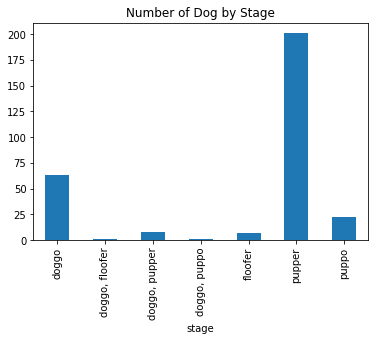

In [72]:
plt.show()

**根据当前已获得的数据可知pupper地位段的狗狗最多，但因大量数据没有狗狗地位信息无法得知tweeter上真实的情况。**